## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pickle
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

In [2]:
with open ('clustering.pkl', 'rb') as f:
    data_clustering=pickle.load(f)
X=np.array(data_clustering['X'])
Y=np.array(data_clustering['Y'])

In [3]:
max_clusters=10
for clusters_num in range (2, max_clusters):
    kmeans_model=KMeans(n_clusters=clusters_num, random_state=17).fit(X)
    centroids, labels=kmeans_model.cluster_centers_, kmeans_model.labels_
    s=silhouette_score(X, labels, metric='euclidean') # closer to 1 is better
    print(s)

0.4465356047465253
0.4523966375832621
0.4417501080615704
0.4282094861336228
0.40478560983361916
0.38328596276503335
0.3783891351049945
0.3760126667235045



### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [4]:
from sklearn.metrics import adjusted_mutual_info_score
max_clusters=10
for clusters_num in range (2, max_clusters):
    kmeans_model=KMeans(n_clusters=clusters_num, random_state=17).fit(X)
    centroids, labels=kmeans_model.cluster_centers_, kmeans_model.labels_
    ami=adjusted_mutual_info_score(Y, labels, average_method='arithmetic') # 1 - best, -1 - worst
    print(ami)
# help(adjusted_mutual_info_score)

0.9286022516535728
0.6138984071108893
0.5827727212133395
0.5358992054576679
0.4923888973263942
0.47804161310259374
0.42547915957390586
0.4302451963662263



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

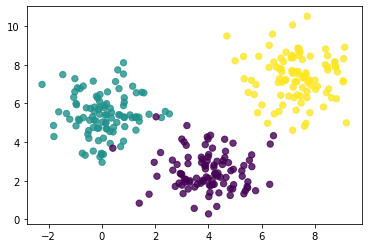

number of clusters is 2, AMI metric is 0.6982356611352036


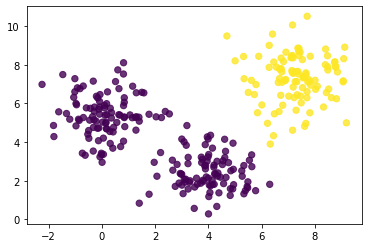

number of clusters is 3, AMI metric is 0.9700074953683859


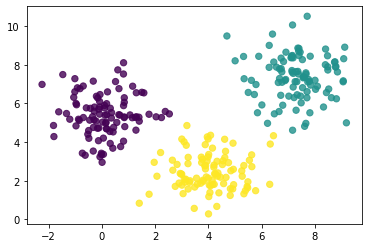

number of clusters is 4, AMI metric is 0.8549275196264138


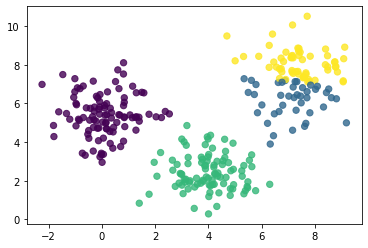

number of clusters is 5, AMI metric is 0.78748412061685


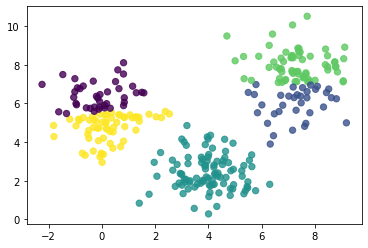

number of clusters is 6, AMI metric is 0.7239370436491013


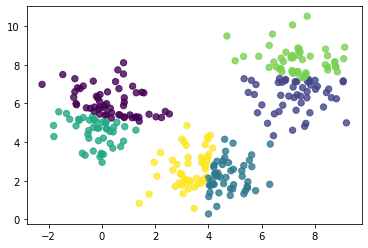

number of clusters is 7, AMI metric is 0.6850084125305531


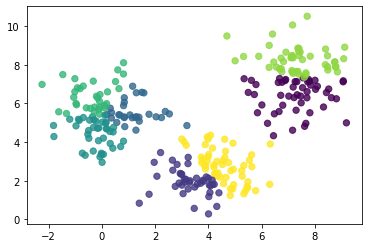

number of clusters is 8, AMI metric is 0.6516828627046698


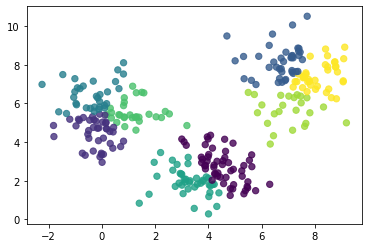

number of clusters is 9, AMI metric is 0.6370764119948639


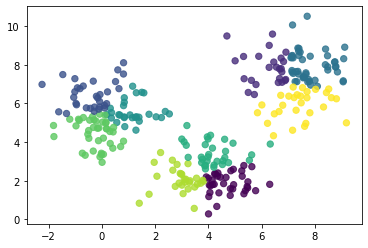

best number of clusters is 3, AMI metric is 0.9700074953683859
point (5,8) belong to [1] cluster
point (0,5) belong to [0] cluster


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('clustering_hw.csv', sep=',')
X=np.array(df.drop(columns='y'))
Y=np.array(df['y'])
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()
max_cluster=10
ami_best=-1
num_best=-1
for cluster_num in range (2, max_cluster):
    kmeans_model=KMeans(n_clusters=cluster_num, random_state=17).fit(X)
    centroids, labels=kmeans_model.cluster_centers_, kmeans_model.labels_
    ami=adjusted_mutual_info_score(labels, Y) # 1 - best, 0 - worst
    print(f"number of clusters is {cluster_num}, AMI metric is {ami}") 
    if ami>ami_best:
        ami_best=ami
        num_best=cluster_num
    plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
    plt.show()
print(f"best number of clusters is {num_best}, AMI metric is {ami_best}")
kmeans_model=KMeans(n_clusters=num_best, random_state=17).fit(X)
y_predicted=kmeans_model.predict([[5,8]])
print(f"point (5,8) belong to {y_predicted} cluster")
y_predicted=kmeans_model.predict([[0,5]])
print(f"point (0,5) belong to {y_predicted} cluster")

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)